<a href="https://colab.research.google.com/github/SiddhiKakkar/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf  #pip install tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() ## unpacking the dataset into train and test datasets

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:

x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

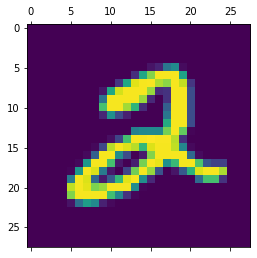

In [7]:
plt.matshow(x_train[5])

In [8]:
y_train[5]

2

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [12]:
x_test_flatten.shape

(10000, 784)

In [13]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
   keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4668 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9253


In [15]:

model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2716 - accuracy: 0.9248


[0.27164164185523987, 0.9247999787330627]

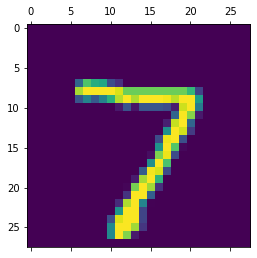

In [16]:
plt.matshow(x_test[0])

In [17]:

y_pred = model.predict(x_test_flatten)
y_pred[0]

array([1.5776843e-02, 1.3769098e-07, 5.7479799e-02, 9.6402431e-01,
       2.2167265e-03, 1.0559440e-01, 1.5184978e-06, 9.9970883e-01,
       7.8346431e-02, 6.2064451e-01], dtype=float32)

In [18]:
np.argmax(y_pred[0])

7

In [19]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1105,    3,    2,    1,    2,    4,    2,   16,    0],
       [   6,    7,  912,   25,   12,    5,   10,    9,   42,    4],
       [   1,    0,   11,  946,    1,   19,    2,    6,   17,    7],
       [   2,    1,    4,    1,  928,    0,    7,    3,   10,   26],
       [   7,    1,    4,   44,   12,  780,   10,    3,   26,    5],
       [  10,    3,    8,    1,    8,   15,  909,    2,    2,    0],
       [   1,    5,   22,   12,   11,    1,    0,  937,    2,   37],
       [   6,    5,    5,   32,    9,   33,   10,    8,  859,    7],
       [  11,    5,    1,   16,   38,    6,    0,   15,    6,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

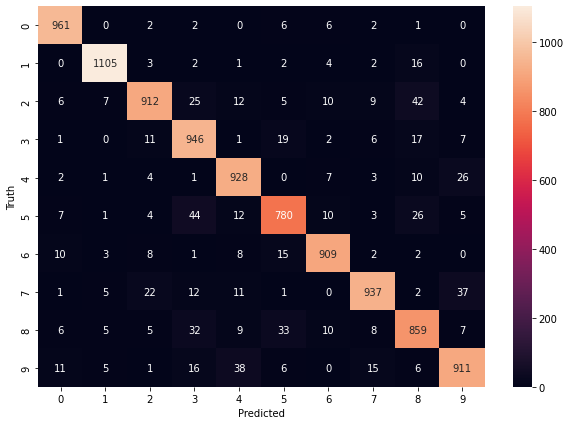

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# adding hidden layer
model = keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,),activation='relu'),
   keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2769 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1270 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0881 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9836


In [23]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9783


[0.07063143700361252, 0.9782999753952026]

Text(69.0, 0.5, 'Truth')

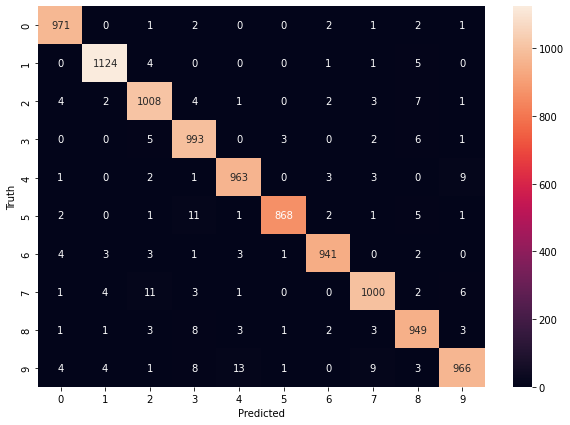

In [24]:
y_pred = model.predict(x_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
# flattening array through keras.Flatten
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2620 - accuracy: 0.9262
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1192 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0817 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0615 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0482 - accuracy: 0.9858
